# Lead Scoring Case study

In [2]:
#importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

<h2>Reading and Inspecting Data</h2>

In [3]:
#Reading/loading the datafile
lead = pd.read_csv("Leads.csv")
lead.head()  

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Overall overview of dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Inferences:
<ul>
    <li>Data set has a total of 37 columns and 9240 rows.</li>
      <li>Out of all the 37 columns , 4 coulmn values are of float , 3 coulmn values are of Int and 30 column are of object type.</li>
      
 </ul>   

In [5]:
# Summary of Dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<h3>Data Exploration</h3>

In [6]:
lead_n = lead.select_dtypes(include=['float64', 'int64'])
lead_n = lead_n.drop(['Lead Number'], axis=1)
lead_n.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


<Figure size 1440x720 with 0 Axes>

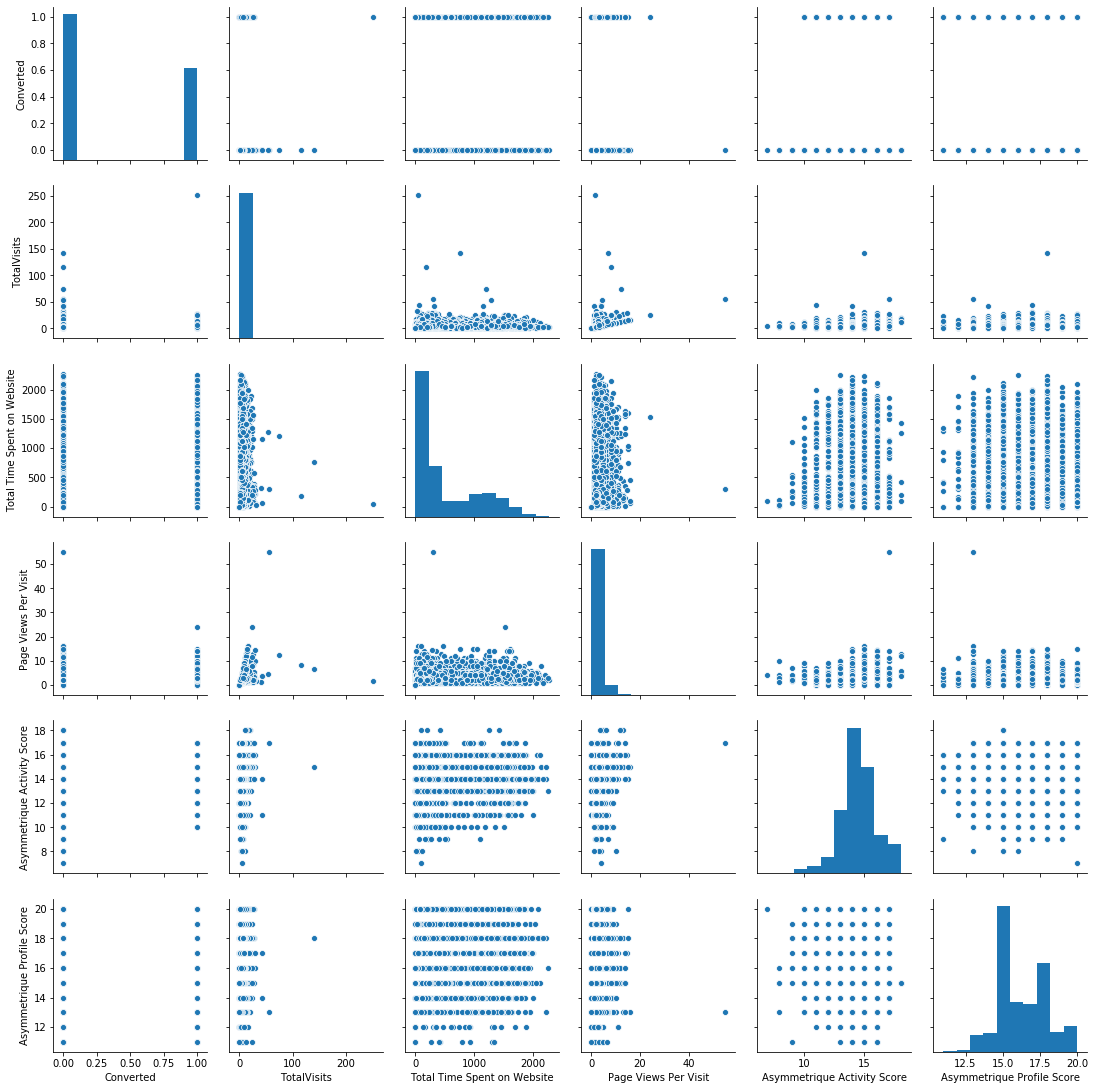

In [8]:
# Pair wise plots 
plt.figure(figsize=(20,10))
sns.pairplot(lead_n)
plt.show()

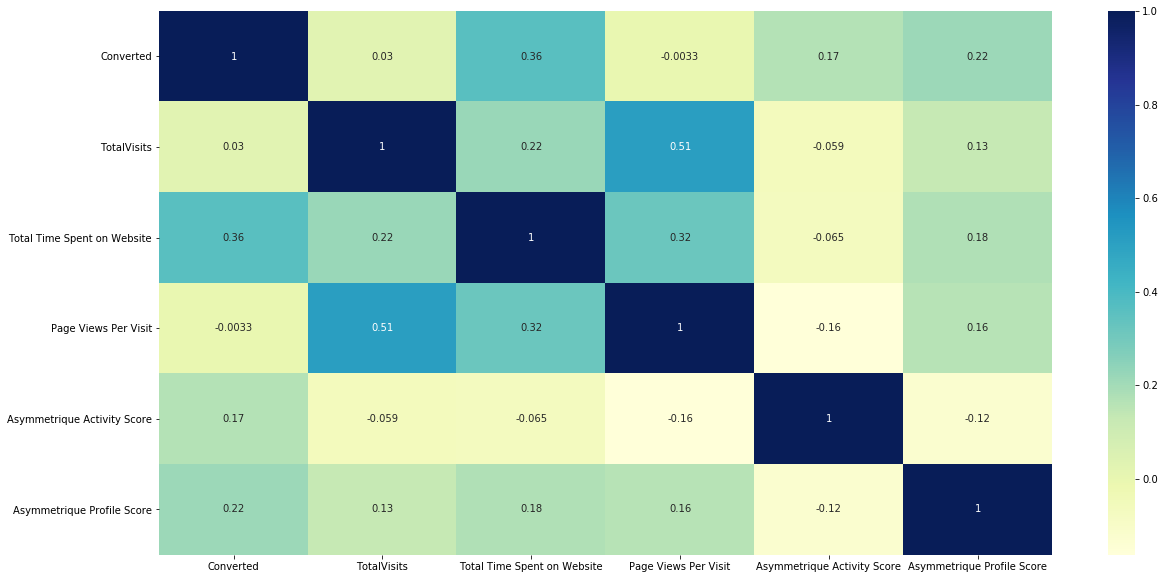

In [9]:
# Correlation Check
plt.figure(figsize=(20,10))
sns.heatmap(lead_n.corr(), cmap="YlGnBu", annot=True)
plt.show()

<h2>Step-2 : Data cleaning</h2>

In [10]:
# Missing values in dataset
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Inference:<br>
We can see that many of the columns are having Null values.<br>
out of all 37 columns ,20 columns have no null values.<br>

In many of the columns we have the values has "select".These can also be considered as null values.So lets check the quantum of "select" values in each column by gettng teh count.

In [12]:
# Checking the number of "select" values in each column
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

<h3>From the above we can get the below :</h3><ul>
<li>"Specialization" column has select values of "1942"</li>
<li>"How did you hear about X Education" column has select values of "5043"</li>
<li>"Lead Profile" column has select values of "4146"</li>
    </ul>
  We will replace the select values with Nan.

In [13]:
# Replace Select values with NaNs
lead = lead.replace("Select",np.nan)

In [14]:
# Percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:
# Drop columns with > 30% of missing values and they don't carry much information
lead = lead.drop(['Lead Number','Country', 'City','Lead Quality','Tags','Asymmetrique Activity Index', 
                          'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score','Asymmetrique Profile Score',
                          'How did you hear about X Education',
                          'Lead Profile',
                         'Last Notable Activity'], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,No


In [17]:
# Drop unneccessary columns
lead = lead.drop(['Magazine','Search','Newspaper Article','X Education Forums',
                          'Newspaper','Digital Advertisement','Prospect ID'], axis=1)

In [19]:
# Null values now
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
dtype: int64

In [20]:
# Handling missing values

lead.Specialization= lead.Specialization.fillna(lead.Specialization.mode()[0])
lead['Lead Source']= lead['Lead Source'].fillna(lead['Lead Source'].mode()[0])
lead['Last Activity']= lead['Last Activity'].fillna(lead['Last Activity'].mode()[0])
lead['What matters most to you in choosing a course']= lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0])
lead.TotalVisits= lead.TotalVisits.fillna(lead.TotalVisits.median())
lead['Page Views Per Visit']= lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())
lead['What is your current occupation']= lead['What is your current occupation'].fillna('Other')

In [23]:
# Conforming null values after handling them
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
dtype: int64

As you see above ,we now have no null values in the data set

In [25]:
# Converting categorical values to binary
varlist =  ['Do Not Email', 'Do Not Call','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

<h3>Dummy variable creation</h3>

In [27]:
# Object variables
lead_categorical = lead.select_dtypes(include=['object'])
lead_categorical.head()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects
1,API,Organic Search,Email Opened,Finance Management,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,Converted to Lead,Finance Management,Unemployed,Better Career Prospects


From the above we can infer that we are left out with 6 columns which have data type as "object"


In [28]:
# Creating dummies
lead_dummies = pd.get_dummies(lead_categorical, drop_first=True)
lead=lead.drop(list(lead_categorical.columns), axis=1)
lead = pd.concat([lead, lead_dummies], axis=1)

In [32]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<h2>Step-3 : EDA.</h2>

In [33]:
lead_eda = pd.read_csv("Leads.csv")

Text(0.5, 1.0, 'Do Not Call')

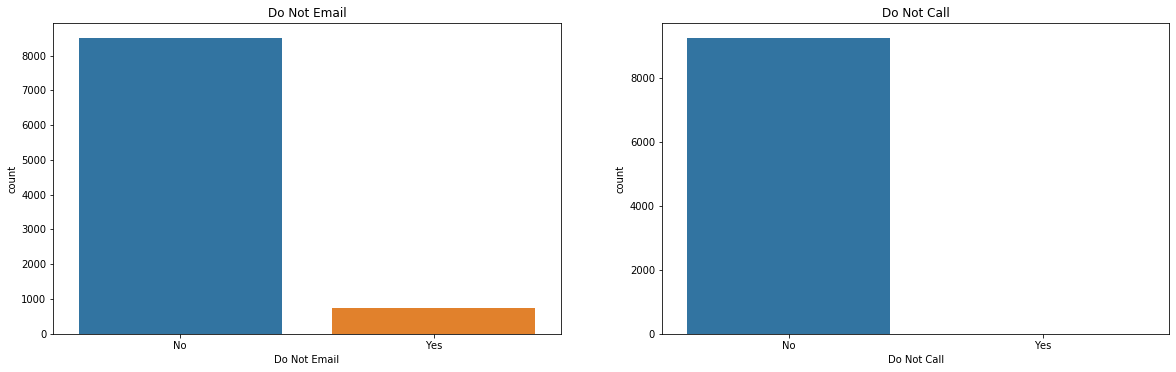

In [34]:
# Univariate Analysis
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_eda['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,2)
sns.countplot(lead_eda['Do Not Call'])
plt.title('Do Not Call')


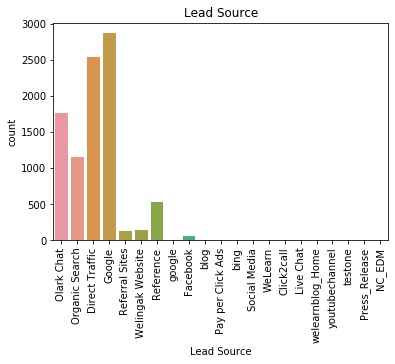

In [35]:
sns.countplot(lead_eda['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

<h2>Step-4 : Test-Train Split</h2>

In [36]:
# Independent Variables
X = lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# Target Variable
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<h3>Scaling</h3>

In [43]:
lead_num= lead.select_dtypes(include=['float64', 'int64'])
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,0,0,4.0,487,1.33,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3516,0,0,5.0,106,2.50,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0,0,5.0,1230,5.00,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3934,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
79,0,0,3.0,705,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8039,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6936,0,0,2.0,238,2.00,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
# Scaling

from sklearn.preprocessing import StandardScaler
# frst we need to create ascaling object
scaler = StandardScaler()

varlist = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

X_train[varlist] = scaler.fit_transform(X_train[varlist])

In [45]:

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,0,0,0.100767,0.005716,-0.470569,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3516,0,0,0.290067,-0.691418,0.070401,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0,0,0.290067,1.365219,1.226321,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3934,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# Conversion rate in percentage
conversion_rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion_rate

38.53896103896104

We got the conversion rate as 38%

In [47]:
# Modeling
import statsmodels.api as sm
log_reg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Dec 2020   Deviance:                          nan
Time:                        20:44:48   Pearson chi2:                 7.32e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     7.97e+13   5.67e+07   1.41e+06      0.000    7.97e+13    7.97e+13
Do Not Email                                                            -3.605e+14   4.42e+06  -8.15e+07      0.000   -3.61e+14   -3.61e+14
Do Not Call                                                              4.294e+15   4.77e+07   9.01e+07      0.000    4.29e+15    4.29e+15
TotalVisits                                                              4.496e+13    9.8e+05   4.59e+07      0.000     4.5e+13     4.5e+13
Total Time Spent on Website                                              6.912e+14   9.49e+05   7.29e+08      0.000    6.91e+14    6.91e+14
Page Views Per Visit                                                    -7.151e+13   1.19e+06  -6.03e+07      0.000   -7.15e+13   -7.15e+13
Through Recommendations                                                 -5.335e+14   2.55e+07  -2.09e+07      0.000   -5.33e+14   -5.33e+14
Receive More Updates About Our Courses                                     11.3852    6.9e-07   1.65e+07      0.000      11.385      11.385
Update me on Supply Chain Content                                         -26.7861   5.11e-07  -5.24e+07      0.000     -26.786     -26.786
Get updates on DM Content                                                   7.6545   4.24e-07   1.81e+07      0.000       7.655       7.655
I agree to pay the amount through cheque                                  -13.8110   1.04e-06  -1.33e+07      0.000     -13.811     -13.811
A free copy of Mastering The Interview                                  -1.664e+14   2.62e+06  -6.35e+07      0.000   -1.66e+14   -1.66e+14
Lead Origin_Landing Page Submission                                      3.077e+14   2.91e+06   1.06e+08      0.000    3.08e+14    3.08e+14
Lead Origin_Lead Add Form                                                1.941e+15    1.3e+07    1.5e+08      0.000    1.94e+15    1.94e+15
Lead Origin_Lead Import                                                 -1.817e+15    4.8e+07  -3.79e+07      0.000   -1.82e+15   -1.82e+15
Lead Origin_Quick Add Form                                               2.054e+15   6.78e+07   3.03e+07      0.000    2.05e+15    2.05e+15
Lead Source_Direct Traffic                                               2.108e+15    4.1e+07   5.15e+07      0.000    2.11e+15    2.11e+15
Lead Source_Facebook                                                     4.541e+15    6.3e+07    7.2e+07      0.000    4.54e+15    4.54e+15
Lead Source_Google                                                       1.859e+15   4.09e+07   4.55e+07      0.000    1.86e+15    1.86e+15
Lea

<h3>Feature Selection</h3>

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 12)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Through Recommendations', False, 21),
 ('Receive More Updates About Our Courses', False, 62),
 ('Update me on Supply Chain Content', False, 61),
 ('Get updates on DM Content', False, 60),
 ('I agree to pay the amount through cheque', False, 63),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 36),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release'

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link

<h2>Step-5 : Prediction</h2>

In [55]:
# Modeling Summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.6
Date:                Mon, 14 Dec 2020   Deviance:                       5307.2
Time:                        20:44:51   Pearson chi2:                 8.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1186      0.056    -19.834      0.000      -1.229      -1.008
Do Not Email                                            -1.4212      0.163     -8.707      0.000      -1.741      -1.101
Total Time Spent on Website                              1.0794      0.040     27.311      0.000       1.002       1.157
Lead Origin_Lead Add Form                                3.3182      0.188     17.673      0.000       2.950       3.686
Lead Source_Olark Chat                                   1.2871      0.104     12.370      0.000       1.083       1.491
Lead Source_Welingak Website                             1.9755      0.743      2.660      0.008       0.520       3.431
Last Activity_Converted to Lead                         -1.2370      0.220     -5.614      0.000      -1.669      -0.805
Last Activity_Had a Phone Conversation                   2.2130      0.678      3.264      0.001       0.884       3.542
Last Activity_Olark Chat Conversation                   -1.2258      0.166     -7.399      0.000      -1.551      -0.901
Last Activity_SMS Sent                                   1.2033      0.074     16.244      0.000       1.058       1.349
What is your current occupation_Housewife               22.7268   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Other                   -1.1528      0.086    -13.410      0.000      -1.321      -0.984
What is your current occupation_Working Professional     2.5399      0.186     13.642      0.000       2.175       2.905
========================================================================================================================
"""

In [56]:
# Predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.312764
6795    0.247413
3516    0.359421
8105    0.826109
3934    0.312764
4844    0.990391
3297    0.129385
8071    0.998733
987     0.054454
7423    0.901675
dtype: float64

In [57]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31276446, 0.24741317, 0.35942132, 0.82610888, 0.31276446,
       0.99039079, 0.12938506, 0.99873349, 0.05445395, 0.90167469])

In [58]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,Conversion_Prob,ID
0,0,0.312764,1871
1,0,0.247413,6795
2,0,0.359421,3516
3,0,0.826109,8105
4,0,0.312764,3934


In [59]:
# conversion probabilty
y_train_pred_final['Convert'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert
0,0,0.312764,1871,0
1,0,0.247413,6795,0
2,0,0.359421,3516,1
3,0,0.826109,8105,1
4,0,0.312764,3934,0


<h3>Confusion Matrix</h3>

In [60]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Convert )
print(confusion) # printng the matrix

[[3197  805]
 [ 478 1988]]


In [61]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Convert))

0.801638837353123


Overall accuracy is 80%.Which is good

In [62]:
TP = confusion[1,1] # true positive (TP)
TN = confusion[0,0] # true negatives (TN)
FP = confusion[0,1] # false positives (FP)
FN = confusion[1,0] # false negatives (FN)

In [63]:
# Sensitivity
TP / float(TP+FN) #formula to calculate Sensitivity

0.8061638280616383

The Sensitivity of Model is 80%

In [64]:
# Specifity
TN / float(TN+FP)

0.7988505747126436

Specificity if Model is 80%

In [65]:
# Positive Predictive Value  (PPV)
print (TP / float(TP+FP))

0.7117794486215538


In [66]:
# Negative predictive value (NPV)
print (TN / float(TN+ FN))

0.8699319727891156


<h3>Checking VIF value</h3>

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.64
2,Lead Origin_Lead Add Form,1.42
7,Last Activity_Olark Chat Conversation,1.41
10,What is your current occupation_Other,1.33
4,Lead Source_Welingak Website,1.24
8,Last Activity_SMS Sent,1.23
1,Total Time Spent on Website,1.22
11,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.05
5,Last Activity_Converted to Lead,1.02


Above is the datafrmae which has the VIF alues for all teh variables in data frame

In [69]:
# drop What is your current occupation_Housewife since it has high p value
col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [70]:
# Summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.8
Date:                Mon, 14 Dec 2020   Deviance:                       5319.7
Time:                        20:44:51   Pearson chi2:                 8.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1089      0.056    -19.722      0.000      -1.219      -0.999
Do Not Email                                            -1.4270      0.163     -8.741      0.000      -1.747      -1.107
Total Time Spent on Website                              1.0785      0.039     27.316      0.000       1.001       1.156
Lead Origin_Lead Add Form                                3.3337      0.187     17.789      0.000       2.966       3.701
Lead Source_Olark Chat                                   1.2814      0.104     12.328      0.000       1.078       1.485
Lead Source_Welingak Website                             1.9541      0.743      2.631      0.009       0.499       3.409
Last Activity_Converted to Lead                         -1.2448      0.220     -5.652      0.000      -1.677      -0.813
Last Activity_Had a Phone Conversation                   2.2043      0.678      3.251      0.001       0.875       3.533
Last Activity_Olark Chat Conversation                   -1.2304      0.166     -7.427      0.000      -1.555      -0.906
Last Activity_SMS Sent                                   1.1954      0.074     16.152      0.000       1.050       1.340
What is your current occupation_Other                   -1.1570      0.086    -13.467      0.000      -1.325      -0.989
What is your current occupation_Working Professional     2.5333      0.186     13.607      0.000       2.168       2.898
========================================================================================================================
"""

In [71]:
# Predicted Values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


1871    0.313796
6795    0.249230
3516    0.360488
8105    0.826201
3934    0.313796
4844    0.990330
3297    0.130556
8071    0.998746
987     0.054308
7423    0.901686
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3137958 , 0.2492297 , 0.36048786, 0.82620088, 0.3137958 ,
       0.99032991, 0.13055609, 0.99874634, 0.0543084 , 0.90168565])

In [73]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,Conversion_Prob,ID
0,0,0.313796,1871
1,0,0.249230,6795
2,0,0.360488,3516
3,0,0.826201,8105
4,0,0.313796,3934


In [74]:
# Conversion probabilty
y_train_pred_final['Convert'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert
0,0,0.313796,1871,0
1,0,0.249230,6795,0
2,0,0.360488,3516,0
3,0,0.826201,8105,1
4,0,0.313796,3934,0


<h3>Confusion Matrix</h3>

In [75]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Convert )
print(confusion) # printng the matrix

[[3557  445]
 [ 749 1717]]


In [76]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Convert))

0.8153988868274582


Overall accuracy is 81%.Which is good

In [77]:
TP = confusion[1,1] # true positive (TP)
TN = confusion[0,0] # true negatives (TN)
FP = confusion[0,1] # false positives (FP)
FN = confusion[1,0] # false negatives (TN)

In [78]:

# Sensitivity
TP / float(TP+FN) #formula to calculate Sensitivity

0.6962692619626926


The Sensitivity of Model is 70%

In [79]:
# Specifity
TN / float(TN+FP)

0.8888055972013993

Specificity if Model is 88%

In [80]:
# PPV  
print (TP / float(TP+FP))

0.7941720629047179


In [81]:
# NPV
print (TN / float(TN+ FN))

0.8260566651184393


<h3>Checking VIF value</h3>

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.64
2,Lead Origin_Lead Add Form,1.41
7,Last Activity_Olark Chat Conversation,1.41
9,What is your current occupation_Other,1.33
4,Lead Source_Welingak Website,1.24
8,Last Activity_SMS Sent,1.23
1,Total Time Spent on Website,1.22
10,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.05
5,Last Activity_Converted to Lead,1.02


In [83]:
# drop What is your current occupation_Other since it having negative co-efficient
col = col.drop('What is your current occupation_Other')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [84]:
# Summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.6
Date:                Mon, 14 Dec 2020   Deviance:                       5519.2
Time:                        20:44:51   Pearson chi2:                 9.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3906      0.053    -26.160      0.000      -1.495      -1.286
Do Not Email                                            -1.4720      0.161     -9.152      0.000      -1.787      -1.157
Total Time Spent on Website                              1.0808      0.039     27.952      0.000       1.005       1.157
Lead Origin_Lead Add Form                                3.6065      0.187     19.259      0.000       3.239       3.974
Lead Source_Olark Chat                                   1.1408      0.101     11.328      0.000       0.943       1.338
Lead Source_Welingak Website                             1.9651      0.743      2.645      0.008       0.509       3.421
Last Activity_Converted to Lead                         -1.2416      0.218     -5.691      0.000      -1.669      -0.814
Last Activity_Had a Phone Conversation                   2.2784      0.679      3.357      0.001       0.948       3.609
Last Activity_Olark Chat Conversation                   -1.3796      0.163     -8.472      0.000      -1.699      -1.060
Last Activity_SMS Sent                                   1.2174      0.073     16.779      0.000       1.075       1.360
What is your current occupation_Working Professional     2.8252      0.186     15.185      0.000       2.461       3.190
========================================================================================================================
"""

In [85]:
# Predict
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


1871    0.230279
6795    0.200292
3516    0.269510
8105    0.786220
3934    0.230279
4844    0.990673
3297    0.101610
8071    0.999122
987     0.121598
7423    0.876622
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23027935, 0.20029207, 0.26951012, 0.78621953, 0.23027935,
       0.99067261, 0.10160991, 0.99912195, 0.12159778, 0.87662228])

In [87]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,Conversion_Prob,ID
0,0,0.230279,1871
1,0,0.200292,6795
2,0,0.269510,3516
3,0,0.786220,8105
4,0,0.230279,3934


In [88]:
# Conversion probabilty
y_train_pred_final['Convert'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert
0,0,0.230279,1871,0
1,0,0.200292,6795,0
2,0,0.269510,3516,0
3,0,0.786220,8105,1
4,0,0.230279,3934,0


<h3>Confusion Matrix</h3>

In [89]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Convert )
print(confusion) # printng the matrix

[[3187  815]
 [ 474 1992]]


In [90]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Convert))

0.8007111935683364


Overall accuracy is 80%.Which is good

In [91]:
TP = confusion[1,1] # true positive (TP)
TN = confusion[0,0] # true negatives (TN)
FP = confusion[0,1] # false positives (FP)
FN = confusion[1,0] # false negatives (FN)

In [92]:

# Sensitivity
TP / float(TP+FN)

0.8077858880778589

The Sensitivity of Model is 80%

In [93]:
# Specifity
TN / float(TN+FP)

0.796351824087956

Specificity if Model is 80%

In [94]:
# PPV
print (TP / float(TP+FP))

0.7096544353402209


In [95]:
# NPV
print (TN / float(TN+ FN))

0.8705271783665665


<h3>Checking VIF value</h3>

In [96]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.55
2,Lead Origin_Lead Add Form,1.41
7,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.22
8,Last Activity_SMS Sent,1.19
9,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.02
6,Last Activity_Had a Phone Conversation,1.01
5,Last Activity_Converted to Lead,1.00


Above is the datafrmae which has the VIF alues for all teh variables in data frame

<h2>Step-6 : Plotting ROC</h2>

In [97]:
# ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

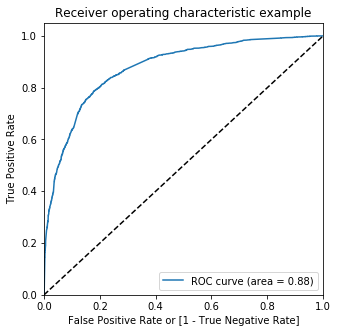

In [99]:
# ROC curve
draw_roc(y_train_pred_final.converted, y_train_pred_final.Conversion_Prob)

<h3>Finding optimal cut off point</h3>

In [100]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.230279,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.200292,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.269510,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.786220,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.230279,3934,0,1,1,1,0,0,0,0,0,0,0


In [101]:
# Sensitivity ,specificity
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix #importing required library
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.585652     0.971208     0.348076
0.2          0.2  0.724181     0.915653     0.606197
0.3          0.3  0.794527     0.828467     0.773613
0.4          0.4  0.811224     0.759124     0.843328
0.5          0.5  0.810451     0.698702     0.879310
0.6          0.6  0.791280     0.581509     0.920540
0.7          0.7  0.777829     0.505272     0.945777
0.8          0.8  0.745207     0.379157     0.970765
0.9          0.9  0.712585     0.265207     0.988256


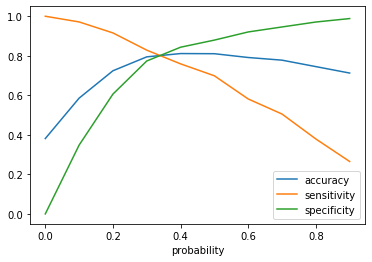

In [102]:
# Plotting the curve to get check the optimum point
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,converted,Conversion_Prob,ID,Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.230279,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.200292,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.269510,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.786220,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.230279,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [104]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8007111935683364

In [105]:
# Confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion_2

array([[3187,  815],
       [ 474, 1992]], dtype=int64)

In [106]:
 #  true positive 
TP = confusion_2[1,1]
# Calculating true negatives
TN = confusion_2[0,0] 
#Calculating false positives
FP = confusion_2[0,1] 
#Calculating false negatives
FN = confusion_2[1,0] 

In [107]:
# Sensitivity
TP / float(TP+FN) #formula to calculate Sensitivity

0.8077858880778589

In [108]:
# Specifity
TN / float(TN+FP)

0.796351824087956

In [109]:
# PPV
print (TP / float(TP+FP))

0.7096544353402209


In [110]:
# NPV
print (TN / float(TN+ FN))

0.8705271783665665


<h2>Step-7 : Prediction on test data set</h2>

In [111]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
4269,0,0,8.0,1011,8.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2376,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0,5.0,59,5.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9199,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4359,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

In [113]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,1,0
2376,0,-0.885371,1,0,0,0,0,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,1,0,0,0,1,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0


In [114]:
X_test_sm = sm.add_constant(X_test)

In [115]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.704578
2376    0.922467
7766    0.644364
9199    0.070025
4359    0.778845
9186    0.520022
1631    0.414776
8963    0.139727
8007    0.051719
5324    0.307094
dtype: float64

In [116]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.704578
2376,0.922467
7766,0.644364
9199,0.070025
4359,0.778845


In [119]:

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [120]:
y_pred_final.head()

,Converted,ID,0
0,1,4269,0.704578
1,1,2376,0.922467
2,1,7766,0.644364
3,0,9199,0.070025
4,1,4359,0.778845


In [121]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [122]:
y_pred_final.head()

,Converted,ID,Conversion_Prob
0,1,4269,0.704578
1,1,2376,0.922467
2,1,7766,0.644364
3,0,9199,0.070025
4,1,4359,0.778845


In [123]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [124]:
y_pred_final.head()

,Converted,ID,Conversion_Prob,final_predicted
0,1,4269,0.704578,1
1,1,2376,0.922467,1
2,1,7766,0.644364,1
3,0,9199,0.070025,0
4,1,4359,0.778845,1


In [125]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8102453102453102

In [126]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1356,  321],
       [ 205,  890]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Sensitivity 
TP / float(TP+FN)

0.8127853881278538

In [129]:
# Specificity
TN / float(TN+FP)

0.8085867620751341

In [130]:
# PPV
print (TP / float(TP+FP))

0.7349298100743188


In [131]:
# FPR
print(FP/ float(TN+FP))

0.19141323792486584


In [132]:
# NPV
print (TN / float(TN+ FN))

0.8686739269698911
